## Логистическая регрессия

В отличии от линейной регрессии, в логистической регрессии мы будем брать знак от скалярного произведения весов на признаки
$$a(x) = \text{sign}\left (w_{0}+\sum^{d}_{i=1}w_{i}x^{i} \right ).$$

$$M_i = y_i(\langle w,x \rangle)$$

$M_i > 0$ - классификатор дает верный ответ<br>
$M_i < 0$ - классификатор ошибается<br>
Чем дальше отступ от нуля, тем классификатор больше уверен в своём ответе

#### Пояснениее: 
если $\langle w,x \rangle$ предсказывает положительный класс и истинное значение (y) тоже показывает положительный класс, то классификатор $M_i > 0$, также это работает и с отрицательным классом

$+   + = +$ 

$-   - = -$

$+   - = -$

$-   + = -$

При классификации нам важен не только знак скалярного произведения $\left \langle w,x \right \rangle$, но и его значение: чем выше оно, тем больше будет расстояние от объекта до разделяющей гиперплоскости, что будет означать, что алгоритм более уверен в отнесении объекта к данному классу. Это приводит нас к значению *отступа*, который равен скалярному произведению вектора весов $w$ на вектор признаков $x$, умноженному на истинное значение ответа $y$, которое, как мы помним, принимает значения -1 и 1:

$$M_{i}=y_{i}\left \langle w,x_{i} \right \rangle.$$

Таким образом, если скалярное произведение отрицательно, и истинный ответ равен -1, отступ будет больше нуля. Если скалярное произведение положительно, и истинный ответ равен 1, отступ также будет положителен. То есть $M_{i}>0$, когда классификатор дает верный ответ, и $M_{i}<0$, когда классификатор ошибается. Отступ характеризует корректность ответа, а его абсолютное значение свидетельствует о расстоянии от разделяющей гиперплоскости, то есть о мере уверенности в ответе.

Как и в случае линейной регрессии, для обучения алгоритма линейной классификации требуется измерять ошибку. По аналогии с средней абсолютной ошибкой и среднеквадратичной ошибкой в случае линейной классификации можно использовать естественный подход: так как возможных ответов конечное число, можно требовать полного совпадения предсказанного класса $a(x_{i})$ и истинного $y_{i}$. Тогда в качестве функционала ошибки можно использовать долю неправильных ответов:

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[a(x_{i}) \neq y_{i}]$$

или, используя понятие отступа,

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[M_{i}<0] = \frac{1}{l}\sum^{l}_{i=1}[y_{i}\left \langle w,x_{i} \right \rangle < 0].$$

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
def loss_function(x):
    return 0 if x > 0 else 1

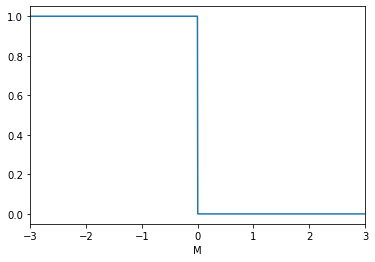

In [7]:
dots = np.linspace(-3, 3, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.plot(dots, q_zero_one_loss);

Она называется _пороговой функцией потерь_ или функцией потерь. Как мы видим, она негладкая, поэтому градиентные методы оптимизации к ней неприменимы. Для упрощения оптимизации используют гладкие оценки сверху этой функции, то есть такие функции, что 

$$[M_{i}<0] \leq \tilde{L}(M_{i}).$$

Тогда минимизировать уже нужно эту новую функцию:

$$Q(a, X) \leq \tilde Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}\tilde{L}(M_{i}) \rightarrow \underset{w}{\text{min}}.$$

Примерами могут быть:

- _экспоненциальная функция потерь_ $\tilde{L}(M_{i}) = \text{exp}(- M_{i})$


- _логистическая функция потерь_ $\tilde{L}(M_{i}) = \text{log}(1 + \text{exp}(- M_{i}))$


- и др. (см. доп. материалы)

Реализуем их и построим соответствующие графики.

In [10]:
def log_loss(x):
    return np.log2(1 + np.exp(-x))

In [11]:
def exp_loss(x):
    return np.exp(-x)

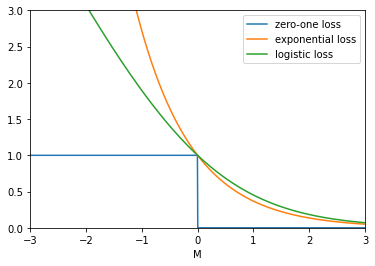

In [15]:
q_exp_loss = [exp_loss(x) for x in dots]
q_logistic_loss = [log_loss(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.ylim(0, 3)
plt.plot(dots, q_zero_one_loss)
plt.plot(dots, q_exp_loss)
plt.plot(dots, q_logistic_loss)
plt.legend(['zero-one loss', 'exponential loss', 'logistic loss']);

Все они оценивают функцию потерь сверху и при этом хорошо оптимизируются.

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

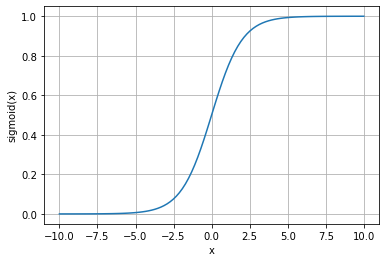

In [19]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = [sigmoid(x) for x in dots]

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value);

При использовании такой функции $\tilde{b}(x_{i}) = \sigma(\left \langle w,x_{i} \right \rangle)$ получаем, что вероятность отнесения объекта к классу "+1" $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)},$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше будет предсказанная вероятность.

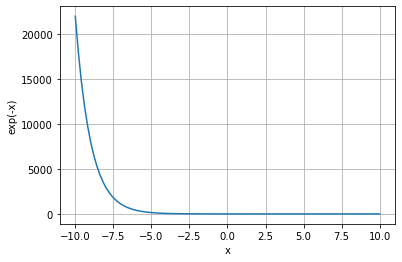

In [20]:
dots = np.linspace(-10, 10, 100)
exp_value = list(map(lambda x: np.exp(-x), dots))

plt.xlabel('x')
plt.ylabel('exp(-x)')
plt.grid()
plt.plot(dots, exp_value);

### Метод максимального правдоподобия <a class='anchor' id='mle'>
Далее для обучения этой модели нам потребуется использовать _метод максимального правдоподобия_ (см. доп. материалы). Его сущность заключается в выборе гипотезы, при которой вероятность получить имеющееся наблюдение максимальна.
    
Пропустим некоторые преобразования, с помощью которых мы из метода максимального правдоподобия переходим к функции потерь
    $$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}p_{+}) + [y_{i} = -1]\text{ln}(1 - p_{+}))).$$


Данная функция потерь называется _логарифмической функцией потерь (log loss)_ или _кросс-энтропией_.

В случае, когда имеются классы 1 и -1:

$$ p_{+} = \sigma({\langle w,x \rangle})$$
$$ p_{-} = \sigma(- {\langle w,x \rangle})$$

$$ p = \sigma(y{\langle w,x \rangle})$$

$$ \text{ln}L = - \sum^{l}_{i=1} \text{ln}(p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}) = $$
$$ = - \sum^{l}_{i=1} \text{ln}(\sigma(y{\langle w,x \rangle})) = - \sum^{l}_{i=1} \text{ln}(\frac{1}{1 + exp(-y{\langle w,x \rangle}})$$
$$ = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

То есть в случае логистической регрессии обучение сводится к минимизации этого функционала.

### Реализация логистической регрессии

In [24]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)
X, y

(array([[ 1.30022717, -0.7856539 ],
        [ 1.44184425, -0.56008554],
        [-0.84792445, -1.36621324],
        [-0.72215015, -1.41129414],
        [-1.27221465,  0.25945106],
        [ 0.78694271,  0.94294879],
        [ 0.81695766, -1.12478707],
        [ 1.6822707 , -0.67596877],
        [-1.07223343, -0.7701513 ],
        [-0.06539297,  1.11257376],
        [-1.33232952,  0.60245671],
        [-0.6963714 ,  0.96382716],
        [ 0.82340614,  0.7561926 ],
        [-1.5155534 , -0.15804853],
        [-0.78971776,  1.70347973],
        [ 0.85887841,  1.04457966],
        [-0.45001335,  0.27345841],
        [ 0.7099324 ,  0.69020919],
        [-0.79095935,  1.60495551],
        [-1.08077536, -1.15530746],
        [-1.5691733 , -0.54054806],
        [-0.52568843,  1.52568161],
        [-1.27406042, -0.1434304 ],
        [ 0.89621114, -1.11509679],
        [-0.85259895, -1.42554982],
        [-0.63262806,  1.2217558 ],
        [-0.86447712, -1.40921978],
        [-0.47819102,  3.174

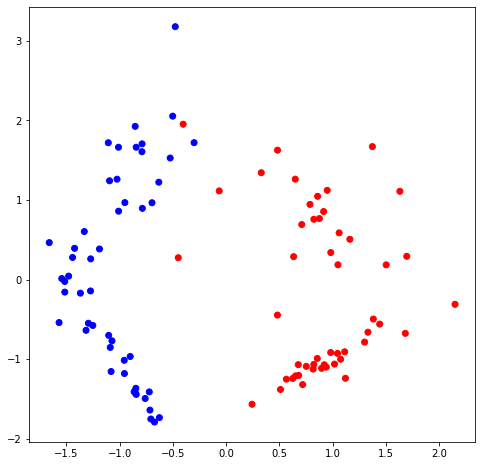

In [25]:
# и изобразим их на графике
colors = ListedColormap(['blue', 'red'])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

Далее разделим выборку на обучающую и тестовую.

In [27]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, 
                                       y, 
                                       test_size=0.3,
                                       random_state=1)

In [28]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((70, 2), (30, 2), (70,), (30,))

Реализуем функцию потерь log loss с одновременным расчетом градиента.

Оптимизировать функционал ошибки будем с помощью градиентного спуска, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X^{T}(A-Y),$$

где $A=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

In [29]:
def log_loss(w, X, y):
    m = X.shape[0]
    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(X, w))
        
    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

In [31]:
##Реализуем градиентный спуск
def grad(w, X, y, n_iterations, eta):
    #Список значений ф-и потерь, для дальнейнего отображения
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta*grad
        losses.append(loss)
    return w, losses

In [37]:
#Функция для предсказываний 
def predict(w, X):
    A = np.squeeze(sigmoid(np.dot(X, w)))
    
    y_pred = np.zeros(X.shape[0])
    
    for i in range(A.shape[0]):
        if A[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
            
    return y_pred

In [38]:
# иницилизируем начальный вектор весов
w0 = np.zeros(train_X.shape[1])
# Начнем обучение 
n_iterations = 1000
eta = 0.05

w, losses = grad(w0, train_X, train_y, n_iterations, eta)

y_predicted_test = predict(w, test_X)

y_predicted_train = predict(w, train_X)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = np.mean(y_predicted_train == train_y) * 100.0
test_accuracy = np.mean(y_predicted_test == test_y) * 100.0

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [3.67273405 0.14147248]
Точность на обучающей выборке: 95.714
Точность на тестовой выборке: 100.000


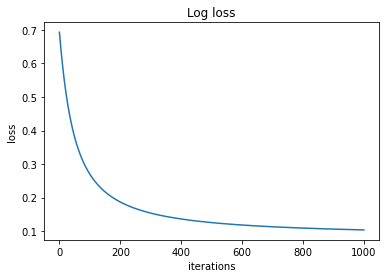

In [39]:
#Изменение ф-и потерь
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

#Визуализация взята с сайта [Визуализация](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)

C:\Users\alimc\AppData\Local\Temp/ipykernel_1612/1611187258.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


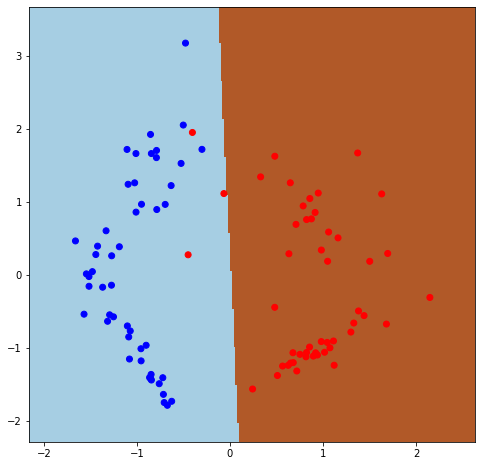

In [40]:
 
plt.figure(figsize=(8, 8))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(w, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

## Оценку классификации можно проводить по разному, для этого существуют метрики, такие как accuracy, precision, recall, f1_score